In [1]:
%matplotlib inline
from fbprophet import Prophet

In [2]:
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [4]:
df = pd.read_csv("C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeet.csv")
df = df[['time','num_meetings','num_calls','average_meeting_minutes','num_30day_active_users','total_meeting_minutes','total_call_minutes']]

In [5]:
def time_set(df):
    import datetime as dt
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]],utc = True)
    df[df.columns[0]]= df.time.dt.date
    df.set_index(df.columns[0], inplace=True)
    return df

In [6]:
def plot(df,df0):
    df1 = df.copy()
    df2 = df0.copy()
    df1 = time_set(df1)
    df2 = time_set(df2)
    for x in range(len(df1.columns)):
        plt.figure(figsize=(22, 10))
        plt.plot(df1.index, df1[df1.columns[x]], label=df1.columns[x])
        plt.plot(df2.index, df2[df2.columns[x]], label='Prophet', color='r')
        plt.legend(loc='best', fontsize='xx-large')
        plt.show()

In [25]:
def timeprediction123(df,csvfilename):
    p = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='210 days', period='15 days', horizon = '70 days')
    
    df_p = performance_metrics(df_cv)
    print("Performance head for " + csvfilename)
    print(df_p.head())
    print("Performance tail for " + csvfilename)
    print(df_p.tail())

    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [26]:
def timepredictionMAPE(df,csvfilename):
    p = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative', changepoint_prior_scale=0.7)
    #changepoint_prior changes the fit of the prediction
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    df_cv = cross_validation(p, initial='210 days', period='15 days', horizon = '70 days')
    try:
        print("MAPE for " + csvfilename + " predictions")
        fig = plot_cross_validation_metric(df_cv, metric='mape')
    except:
        print("MAPE way too low to be graphed, prediction is very good")
    df2 = time_pred[['yhat']]
    return df1,df2,time_pred

In [9]:
def send_prediction(df):
    df_with_all_preds = timeprediction123(df = df[['time', df.columns[1]]], csvfilename = df.columns[1])[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : df.columns[1]})
    df1= df.drop(columns= [df.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timeprediction123(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1])[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

In [10]:
def send_predictionMAPE(df):
    df_with_all_preds = timepredictionMAPE(df = df[['time', df.columns[1]]], csvfilename = df.columns[1])[0]
    df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : df.columns[1]})
    df1= df.drop(columns= [df.columns[1]])
    
    for x in range(len(df1.columns) - 1):
        h =timepredictionMAPE(df = df1[['time', df1.columns[x+1]]], csvfilename = df1.columns[x+1])[0]
        h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : df1.columns[x+1]})
        df_with_all_preds =  df_with_all_preds.merge(h, on = "time")
    return df_with_all_preds

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_meetings
  horizon        mse      rmse       mae  coverage
0  4 days  38.903734  6.237286  4.743482  0.714286
1  5 days  64.501337  8.031272  6.217532  0.714286
2  6 days  63.040574  7.939809  6.085327  0.714286
3  7 days  66.835964  8.175327  6.825878  0.500000
4  8 days  93.377981  9.663228  7.748423  0.500000
Performance tail for num_meetings
   horizon         mse       rmse        mae  coverage
32 36 days  243.234511  15.595977  12.360469  0.357143
33 37 days  210.367018  14.504035  11.548515  0.357143
34 38 days  170.689930  13.064836  11.038633  0.357143
35 39 days  100.971977  10.048481   8.644057  0.428571
36 40 days   60.580541   7.783350   6.337197  0.500000


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_calls
  horizon          mse       rmse        mae  coverage
0  4 days   456.969023  21.376834  17.111930  0.785714
1  5 days   589.546071  24.280570  20.108016  0.714286
2  6 days   552.946199  23.514808  18.130603  0.714286
3  7 days   544.080921  23.325542  18.942661  0.642857
4  8 days  1079.987233  32.863159  23.490552  0.642857
Performance tail for num_calls
   horizon          mse       rmse        mae  coverage
32 36 days  1834.419730  42.830126  34.578527  0.500000
33 37 days  1619.661345  40.245016  30.514681  0.642857
34 38 days  1091.218409  33.033595  24.098469  0.642857
35 39 days   412.496779  20.310017  13.948494  0.785714
36 40 days   153.796723  12.401481   7.745847  0.857143


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for average_meeting_minutes
  horizon         mse       rmse        mae  coverage
0  4 days  375.775299  19.384925  17.815526  0.571429
1  5 days  418.174433  20.449314  19.241669  0.571429
2  6 days  688.754142  26.244126  23.511461  0.571429
3  7 days  582.369339  24.132330  20.755560  0.785714
4  8 days  593.266414  24.357061  21.107691  0.714286
Performance tail for average_meeting_minutes
   horizon          mse       rmse        mae  coverage
32 36 days  1290.880513  35.928826  27.126986  0.571429
33 37 days  1338.457905  36.584941  28.180646  0.428571
34 38 days   847.785017  29.116748  20.819965  0.571429
35 39 days   247.548730  15.733681  10.617803  0.785714
36 40 days   198.150322  14.076588  10.856830  0.785714


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_30day_active_users
  horizon          mse       rmse        mae  coverage
0  4 days   737.666166  27.160010  22.833825  0.571429
1  5 days  1653.593966  40.664407  30.632460  0.500000
2  6 days  3215.168121  56.702453  40.712192  0.500000
3  7 days  5595.249162  74.801398  52.636140  0.500000
4  8 days  9130.791397  95.555175  69.738997  0.500000
Performance tail for num_30day_active_users
   horizon           mse         rmse         mae  coverage
32 36 days  1.489184e+06  1220.321308  933.175876  0.000000
33 37 days  1.480055e+06  1216.575132  928.524619  0.000000
34 38 days  1.457466e+06  1207.255387  918.838688  0.000000
35 39 days  1.412839e+06  1188.629155  896.923150  0.000000
36 40 days  1.348513e+06  1161.255088  865.213082  0.142857


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for total_meeting_minutes
  horizon            mse        rmse         mae  coverage
0  4 days   99353.731063  315.204269  215.565388  0.571429
1  5 days  134711.464995  367.030605  255.602415  0.571429
2  6 days  132837.907439  364.469350  253.378130  0.642857
3  7 days  127887.965781  357.614270  281.251265  0.500000
4  8 days  159129.533476  398.910433  329.291124  0.357143
Performance tail for total_meeting_minutes
   horizon            mse        rmse         mae  coverage
32 36 days  135179.614386  367.667804  316.879438  0.285714
33 37 days  111085.053139  333.294244  272.506227  0.357143
34 38 days   63898.688102  252.781898  209.259963  0.571429
35 39 days   26835.599555  163.815749  134.197072  0.857143
36 40 days   15251.119120  123.495421   98.351615  1.000000


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


Performance head for total_call_minutes
  horizon            mse        rmse         mae  coverage
0  4 days  399531.544871  632.085077  537.431311  0.857143
1  5 days  265552.569038  515.317930  402.124441  0.928571
2  6 days  253092.225182  503.082722  366.550235  1.000000
3  7 days  206628.530257  454.564110  334.927347  1.000000
4  8 days  318532.346942  564.386700  419.353589  0.857143
Performance tail for total_call_minutes
   horizon           mse         rmse          mae  coverage
32 36 days  4.011581e+06  2002.893138  1675.913583  0.285714
33 37 days  3.589644e+06  1894.635473  1484.735830  0.357143
34 38 days  1.848033e+06  1359.423788   920.177879  0.571429
35 39 days  3.121556e+05   558.708861   416.644630  0.857143
36 40 days  1.828351e+06  1352.165468   711.894672  0.857143


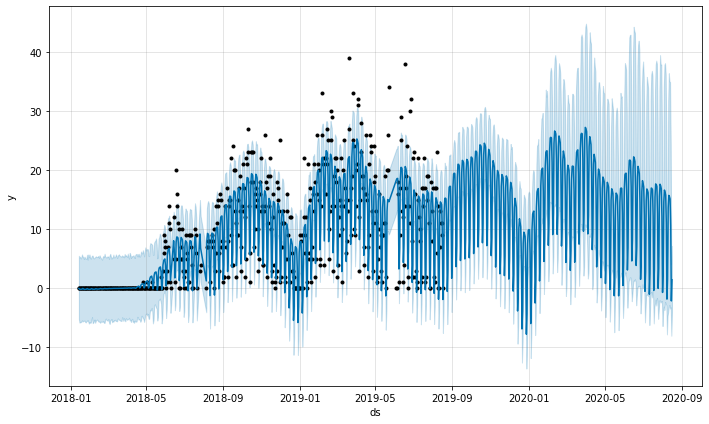

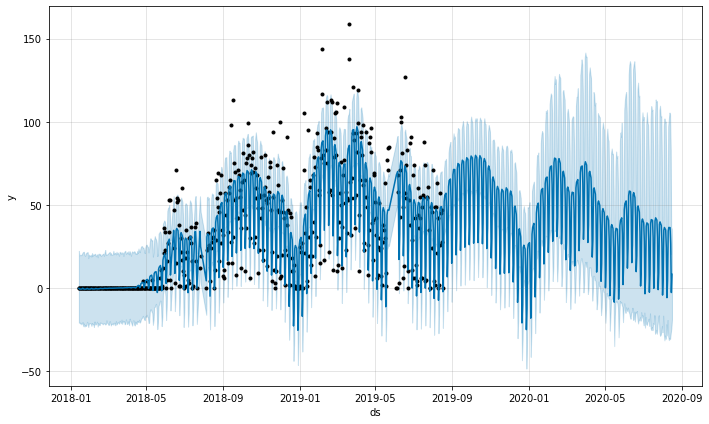

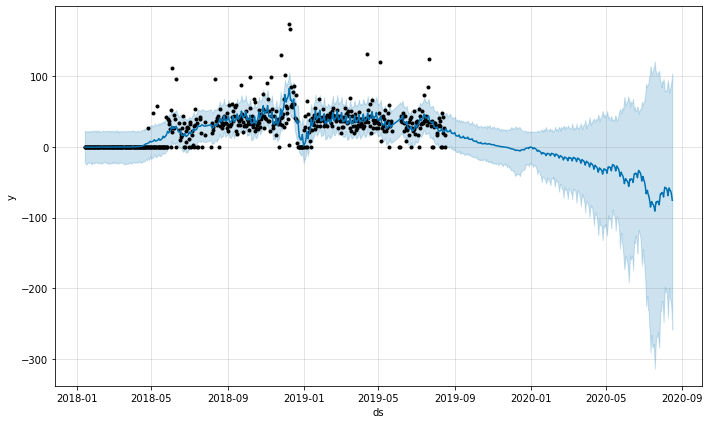

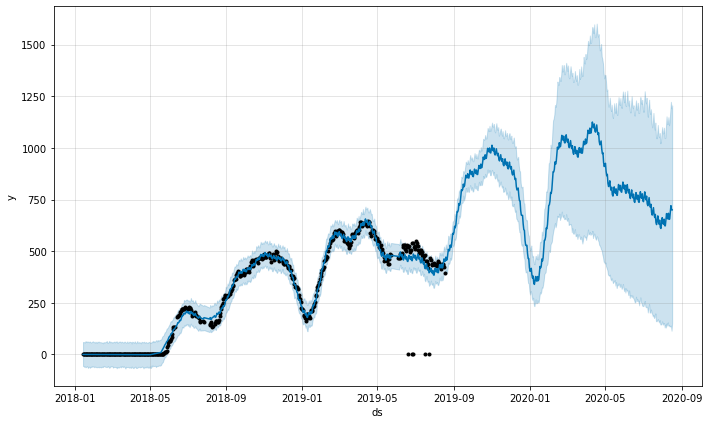

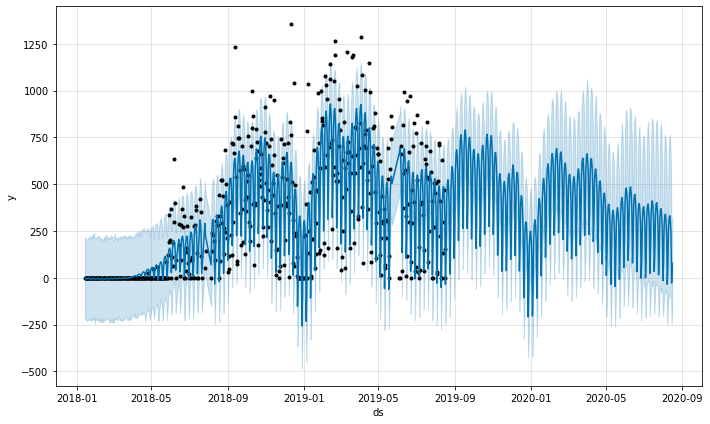

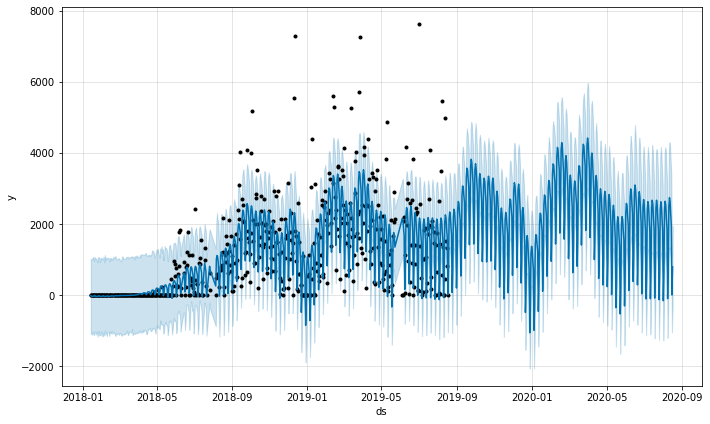

In [11]:
prediction = send_prediction(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_meetings predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_calls predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for average_meeting_minutes predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_30day_active_users predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for total_meeting_minutes predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 2 forecasts with cutoffs between 2019-03-30 00:00:00 and 2019-07-08 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


MAPE for total_call_minutes predictions
MAPE way too low to be graphed, prediction is very good


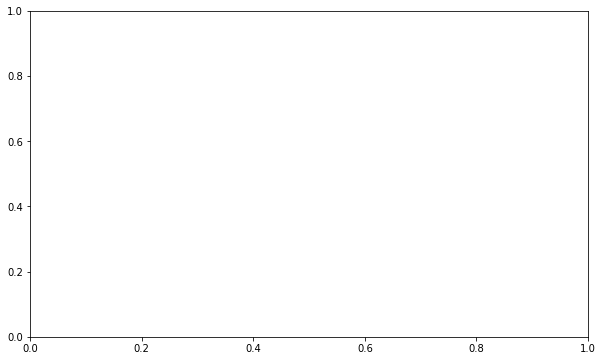

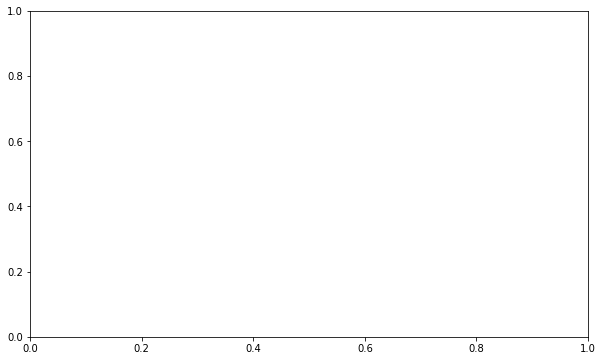

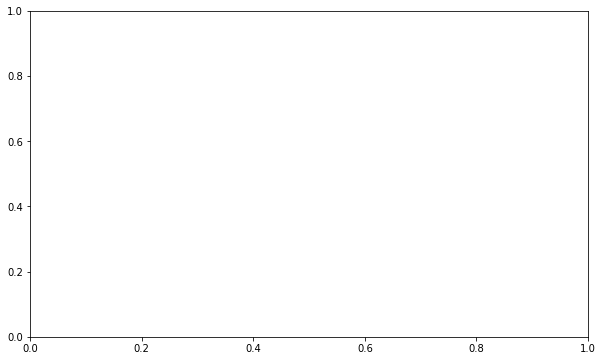

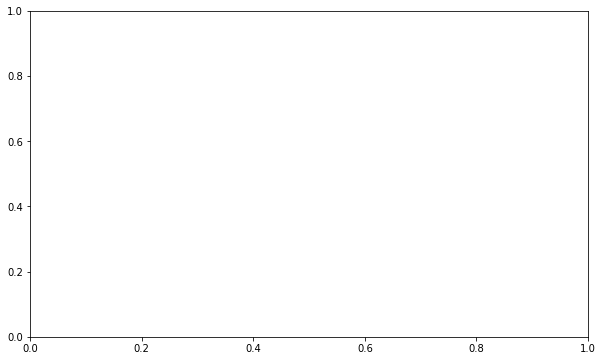

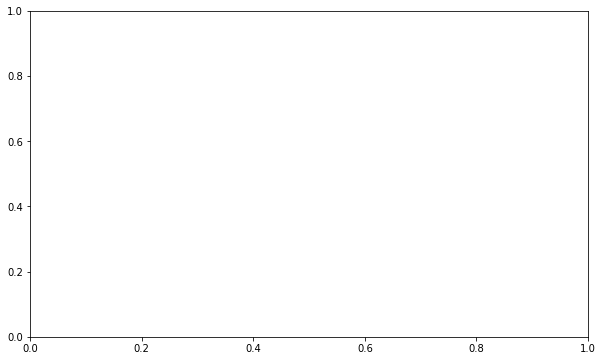

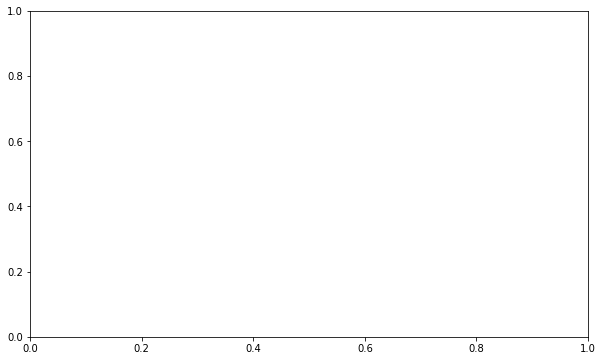

In [12]:
prediction1 = send_predictionMAPE(df)

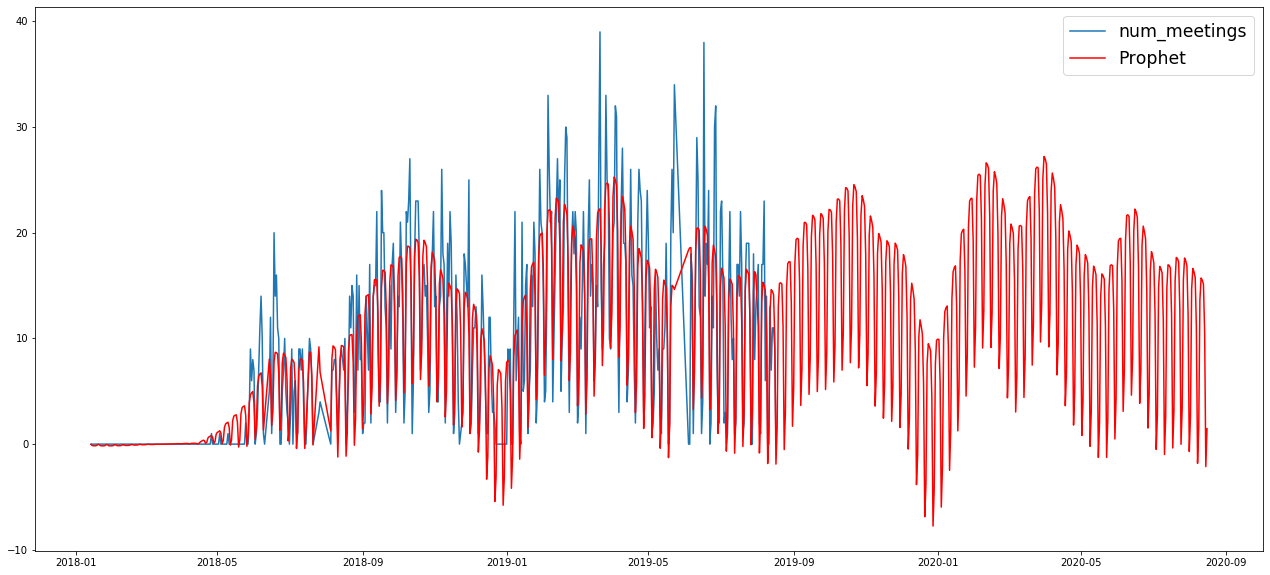

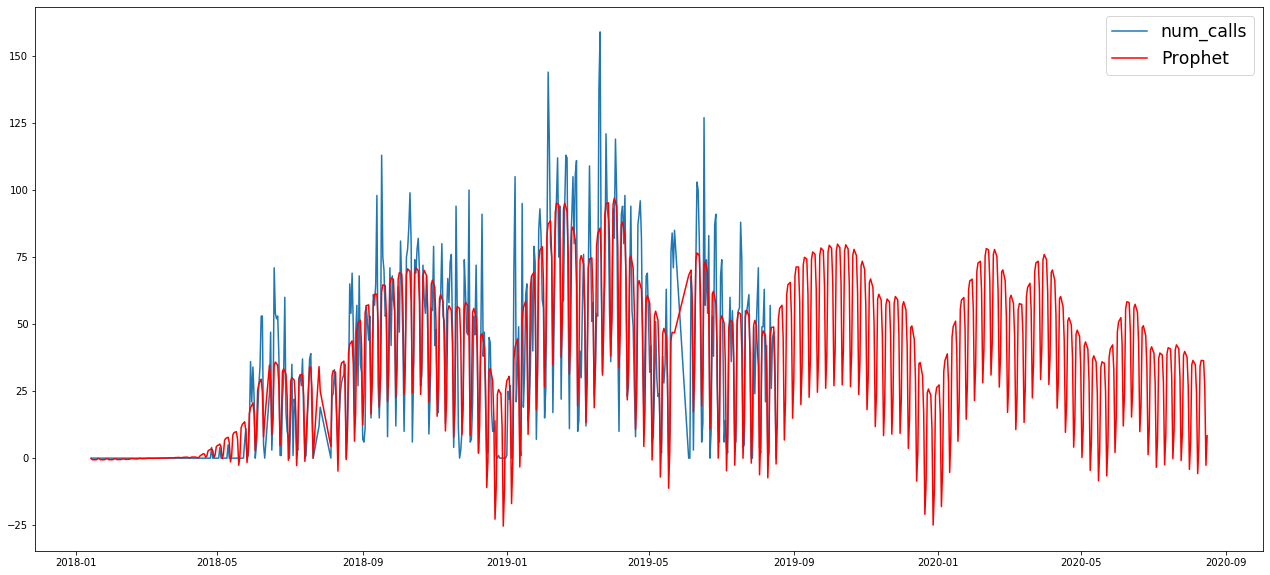

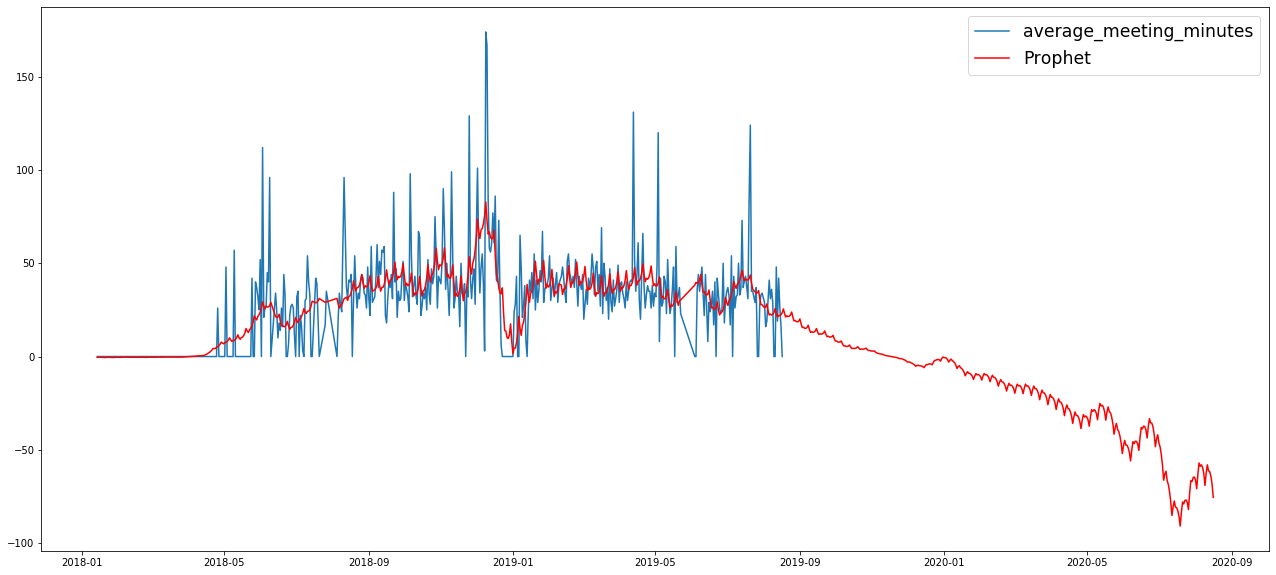

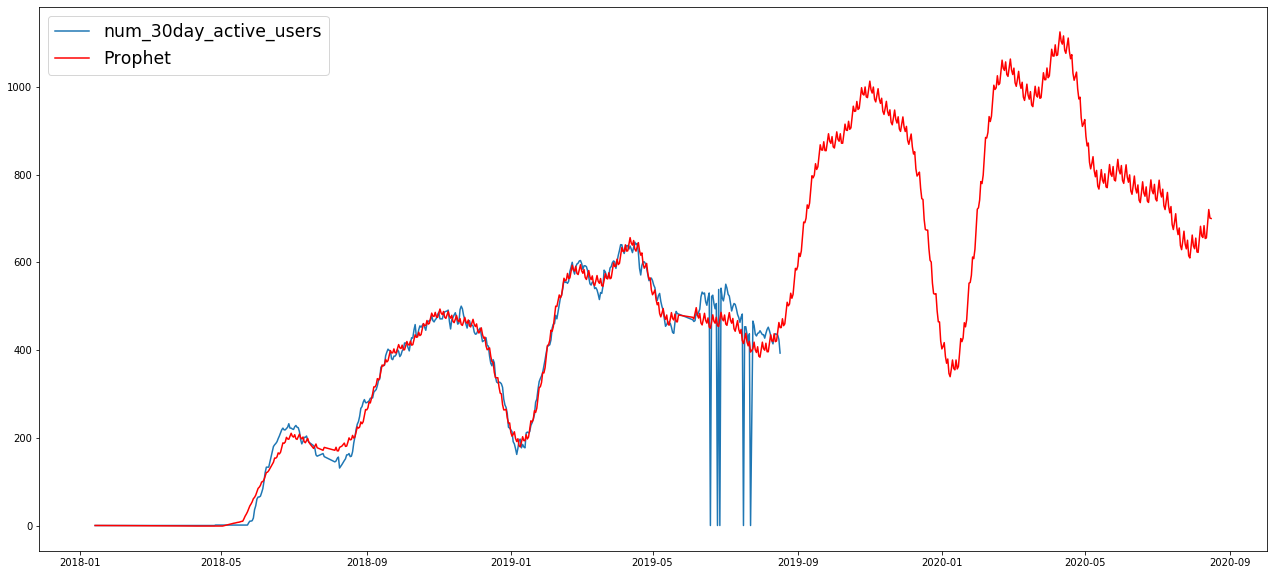

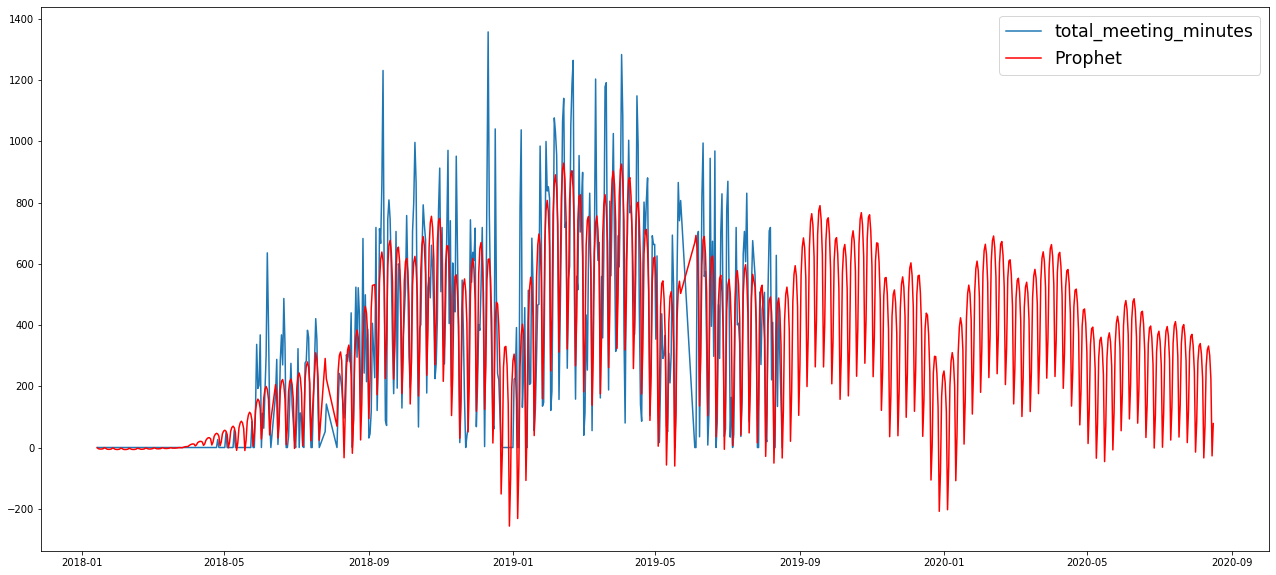

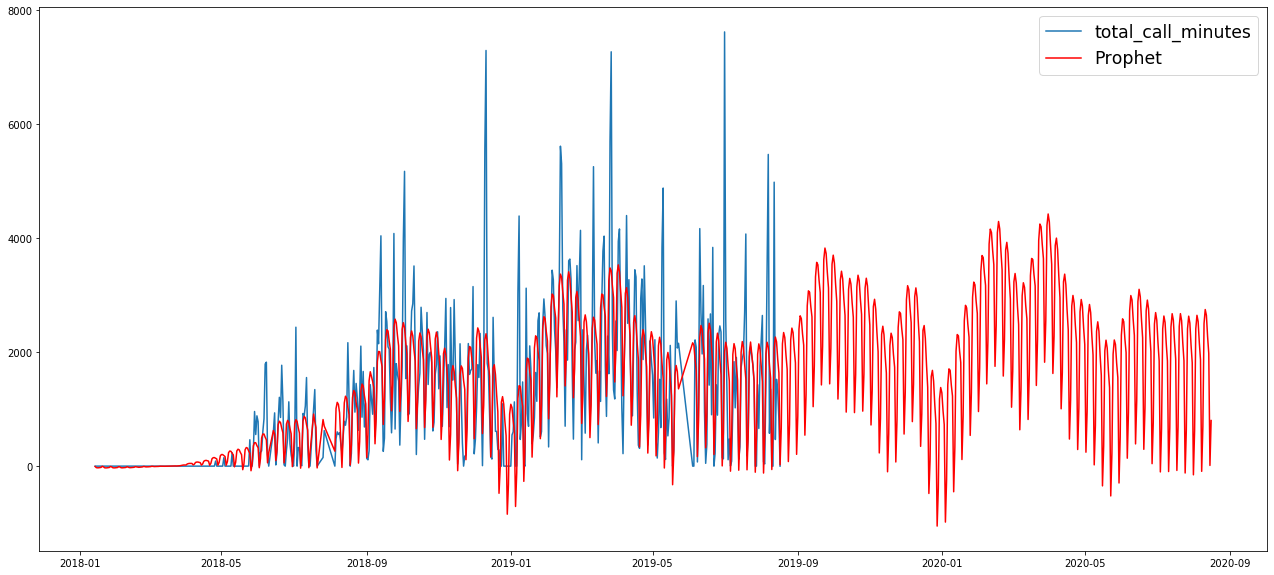

In [13]:
plot(df,prediction)

In [33]:
prediction.head()

,time,num_meetings,num_calls,average_meeting_minutes,num_30day_active_users,total_meeting_minutes,total_call_minutes
0,2018-04-26,3.223227,12.864670,44.314641,-53.096640,122.601634,459.435757
1,2018-05-03,3.441592,13.176458,40.380467,-14.525301,112.831044,461.182178
2,2018-05-10,3.797994,13.531742,36.765775,16.247984,111.484482,447.545704
3,2018-05-25,4.687378,17.137130,40.687527,79.799483,164.466900,474.730162
4,2018-05-28,6.326263,25.892055,43.584527,91.297948,214.918316,694.301894


In [27]:
df2 = df[df['num_meetings']!=0]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_meetings
  horizon         mse       rmse       mae      mape  coverage
0  8 days   97.707867   9.884729  7.403982  1.342481  0.450000
1  9 days  106.427899  10.316390  7.892612  1.385524  0.400000
2 10 days  113.808045  10.668085  8.192436  1.395385  0.382888
3 11 days  130.901495  11.441219  8.876687  1.588243  0.352941
4 12 days  161.802725  12.720170  9.885058  1.728914  0.312745
Performance tail for num_meetings
   horizon         mse       rmse        mae      mape  coverage
58 66 days  549.010167  23.430966  17.753281  1.915188  0.329412
59 67 days  507.349904  22.524429  17.257767  1.907593  0.364706
60 68 days  479.506539  21.897638  16.956809  1.903626  0.352941
61 69 days  434.391721  20.842066  15.990897  1.883775  0.386275
62 70 days  406.210779  20.154671  15.272784  1.765921  0.411765


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_calls
  horizon          mse       rmse        mae      mape  coverage
0  8 days  3049.140326  55.219021  37.732546  2.138005  0.402941
1  9 days  3632.253909  60.268183  40.989337  2.219429  0.364706
2 10 days  4346.392724  65.927177  44.140282  2.271278  0.346524
3 11 days  5463.456223  73.915196  49.645263  2.232928  0.317647
4 12 days  6986.341049  83.584335  56.566119  2.545896  0.276471
Performance tail for num_calls
   horizon          mse       rmse        mae      mape  coverage
58 66 days  2443.614731  49.432932  38.908233  1.390285  0.447059
59 67 days  2652.692394  51.504295  40.189637  1.365275  0.458824
60 68 days  2746.525619  52.407305  41.554968  1.365359  0.411765
61 69 days  2570.235011  50.697485  39.902682  1.375459  0.444118
62 70 days  2526.074197  50.260066  38.522550  1.230139  0.482353


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for average_meeting_minutes
  horizon          mse       rmse        mae      mape  coverage
0  8 days   790.937670  28.123614  19.695210  0.550031  0.708824
1  9 days  1215.635078  34.865959  22.985470  0.671917  0.643137
2 10 days  1829.333488  42.770708  26.831056  0.798902  0.574332
3 11 days  2688.313344  51.848947  31.826435  0.820921  0.494118
4 12 days  2764.677340  52.580199  33.117364  0.917410  0.462745
Performance tail for average_meeting_minutes
   horizon           mse        rmse         mae      mape  coverage
58 66 days  76203.101325  276.049092  159.020324  4.185725  0.235294
59 67 days  66154.264699  257.204714  152.990264  4.139944  0.235294
60 68 days  58204.061267  241.255179  147.862843  4.072211  0.247059
61 69 days  52330.433626  228.758461  142.551357  3.986313  0.268627
62 70 days  55499.335106  235.582969  147.299363  4.037524  0.282353


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for num_30day_active_users
  horizon           mse        rmse         mae  coverage
0  8 days   4461.164024   66.791946   55.609767  0.044118
1  9 days   6698.633238   81.845178   69.568629  0.037255
2 10 days   9296.321139   96.417432   83.387540  0.036364
3 11 days  13592.666358  116.587591  100.995239  0.035294
4 12 days  20094.661210  141.755639  121.122333  0.035294
Performance tail for num_30day_active_users
   horizon           mse         rmse          mae  coverage
58 66 days  1.927254e+06  1388.255666  1042.328500  0.176471
59 67 days  1.998520e+06  1413.690269  1066.110779  0.152941
60 68 days  1.931058e+06  1389.625195  1053.484471  0.129412
61 69 days  1.851385e+06  1360.656260  1041.283388  0.115686
62 70 days  1.809480e+06  1345.169110  1047.890262  0.105882


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Performance head for total_meeting_minutes
  horizon            mse        rmse         mae      mape  coverage
0  8 days  378615.373277  615.317295  387.995361  3.668027  0.497059
1  9 days  445516.696887  667.470372  414.339020  3.723128  0.482353
2 10 days  539835.287433  734.734842  458.340371  3.834938  0.452406
3 11 days  665652.759331  815.875456  517.222560  2.514988  0.400000
4 12 days  792057.570963  889.976163  558.988069  2.907903  0.380392
Performance tail for total_meeting_minutes
   horizon            mse        rmse         mae      mape  coverage
58 66 days  417503.703134  646.145265  485.058981  1.690182  0.411765
59 67 days  398832.378110  631.531771  479.813825  1.445787  0.411765
60 68 days  369007.666988  607.460013  464.986501  1.726489  0.400000
61 69 days  333460.701775  577.460563  444.777555  1.755005  0.407843
62 70 days  323084.177709  568.404942  435.950595  1.633001  0.423529


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00


Performance head for total_call_minutes
  horizon           mse         rmse          mae      mape  coverage
0  8 days  7.259517e+06  2694.349152  1812.006543  3.539153  0.450000
1  9 days  7.981914e+06  2825.228219  1878.469216  3.625358  0.433333
2 10 days  9.043866e+06  3007.302178  1943.375158  3.758130  0.438503
3 11 days  1.065188e+07  3263.722160  2093.924006  2.486003  0.423529
4 12 days  1.254817e+07  3542.339998  2263.680612  2.887697  0.417647
Performance tail for total_call_minutes
   horizon           mse         rmse          mae      mape  coverage
58 66 days  7.627358e+06  2761.767214  2152.552359  1.687514  0.364706
59 67 days  7.247467e+06  2692.112050  2114.486994  1.626798  0.364706
60 68 days  6.263004e+06  2502.599456  1954.844934  1.716113  0.364706
61 69 days  5.570782e+06  2360.250374  1823.682069  1.740129  0.406863
62 70 days  4.945031e+06  2223.742534  1719.940099  1.658313  0.423529


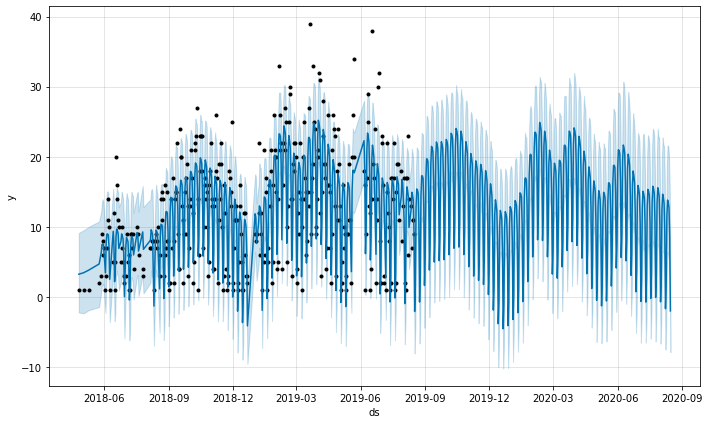

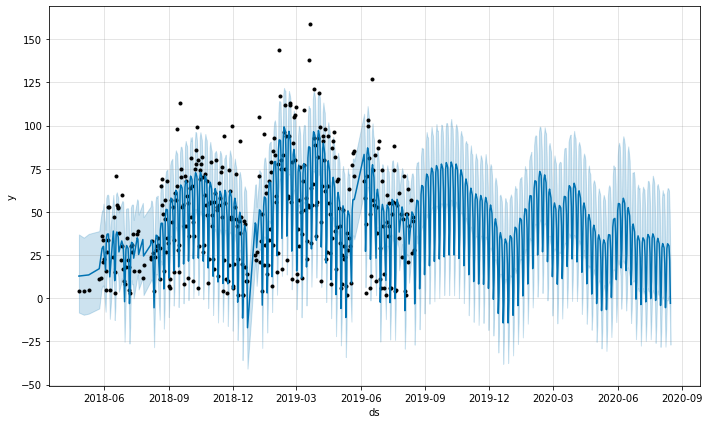

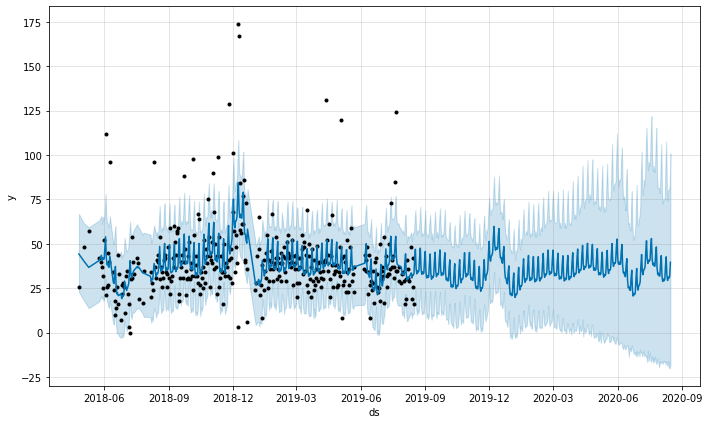

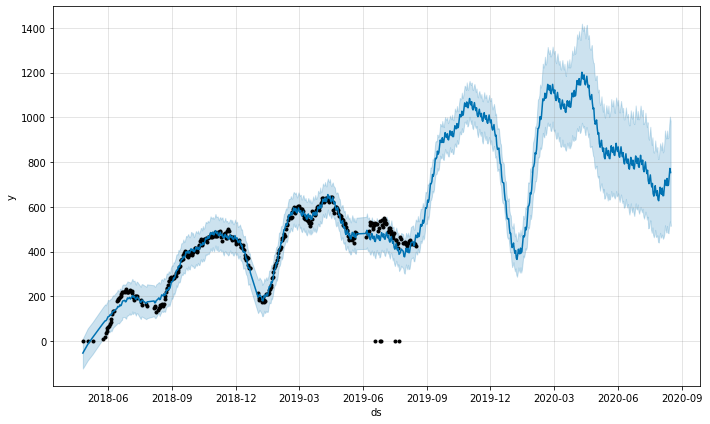

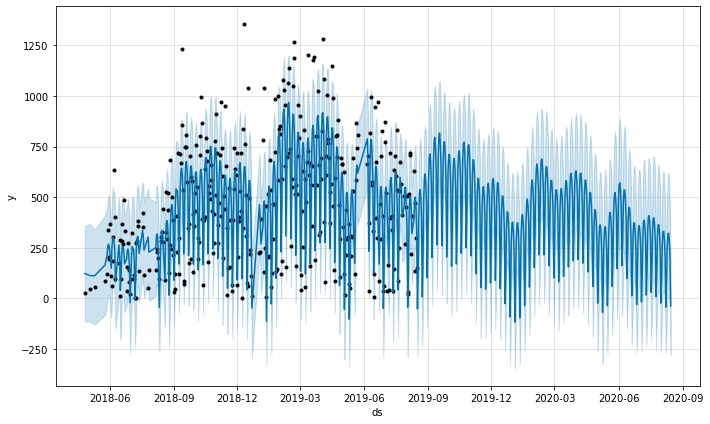

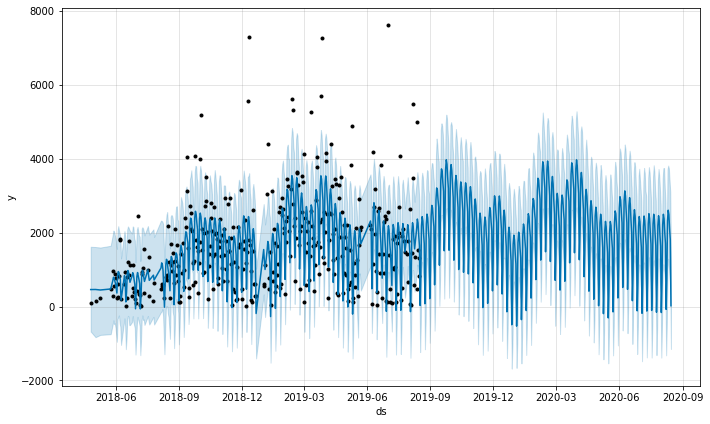

In [28]:
prediction = send_prediction(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_meetings predictions


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_calls predictions


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for average_meeting_minutes predictions


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for num_30day_active_users predictions
MAPE way too low to be graphed, prediction is very good


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAPE for total_meeting_minutes predictions


INFO:fbprophet:Making 14 forecasts with cutoffs between 2018-11-24 00:00:00 and 2019-06-07 00:00:00


MAPE for total_call_minutes predictions


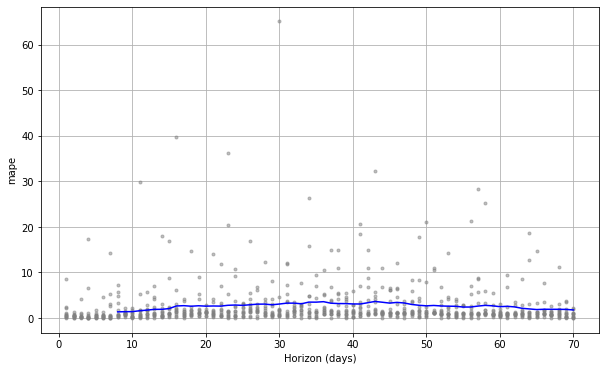

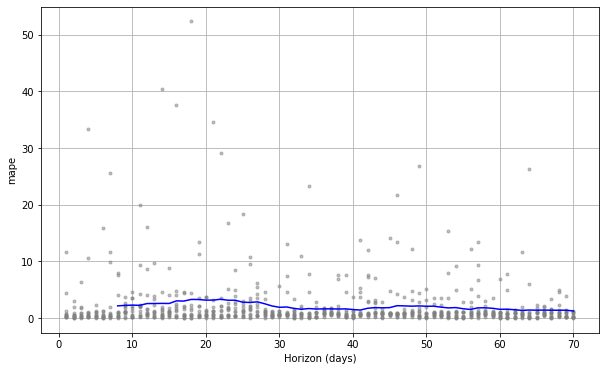

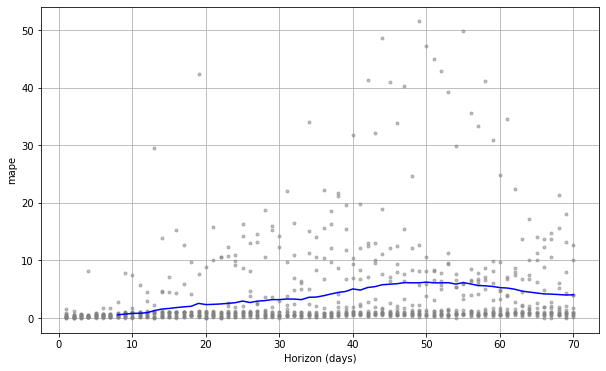

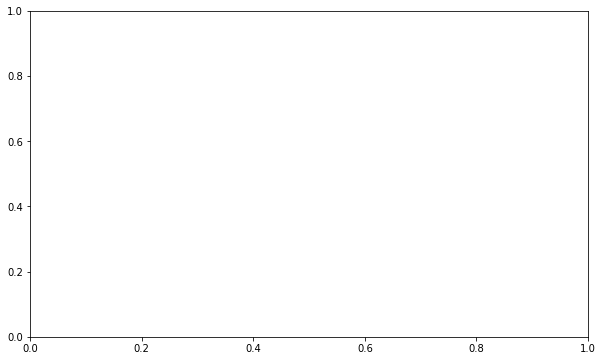

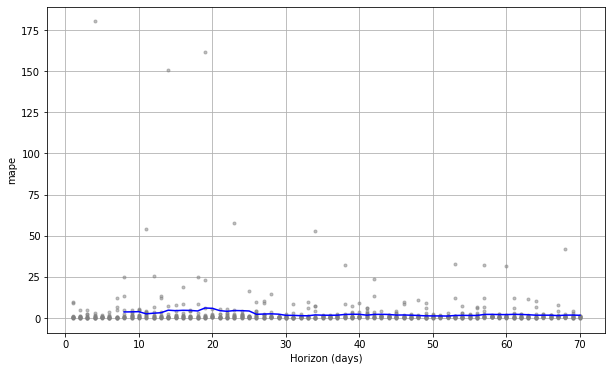

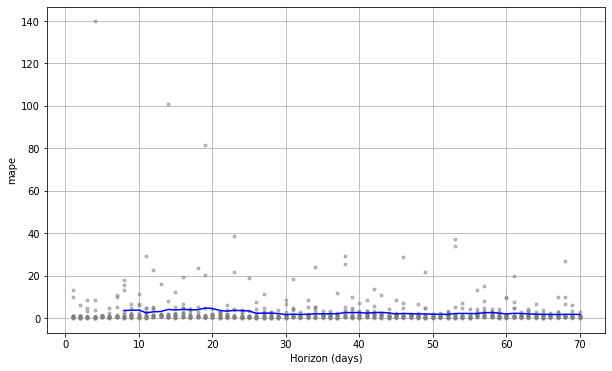

In [29]:
prediction2 = send_predictionMAPE(df2)

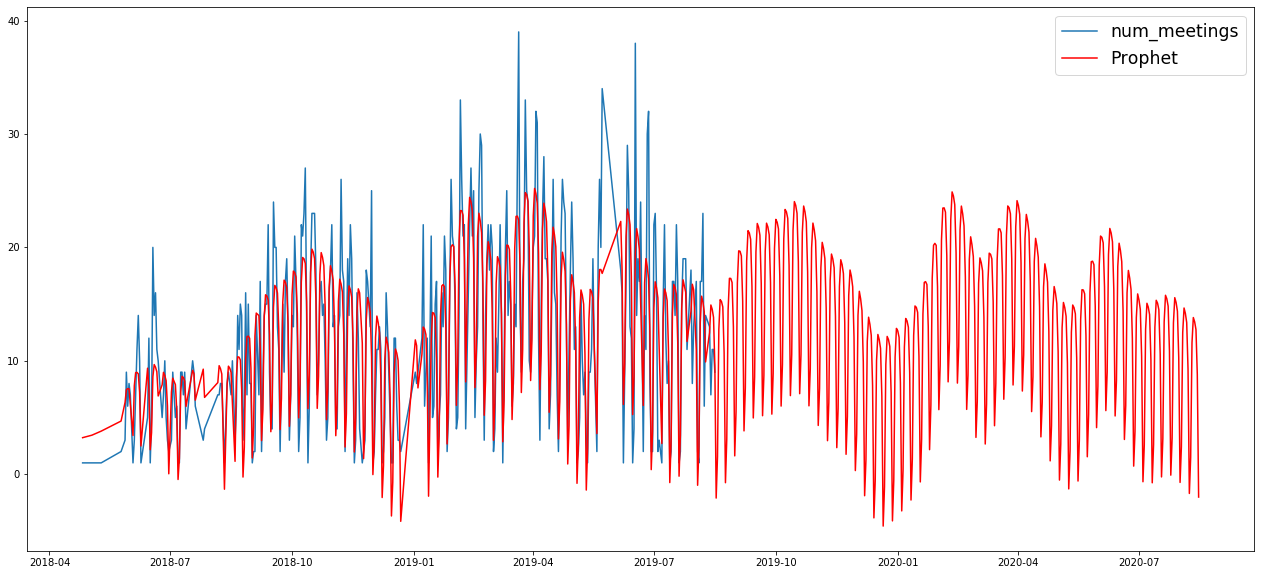

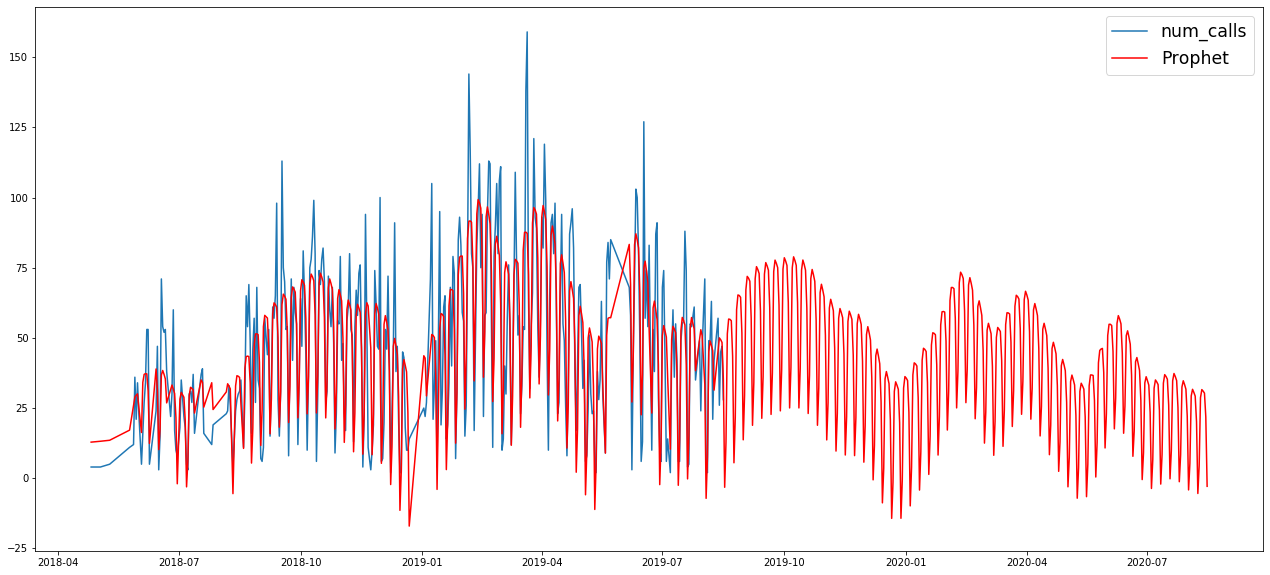

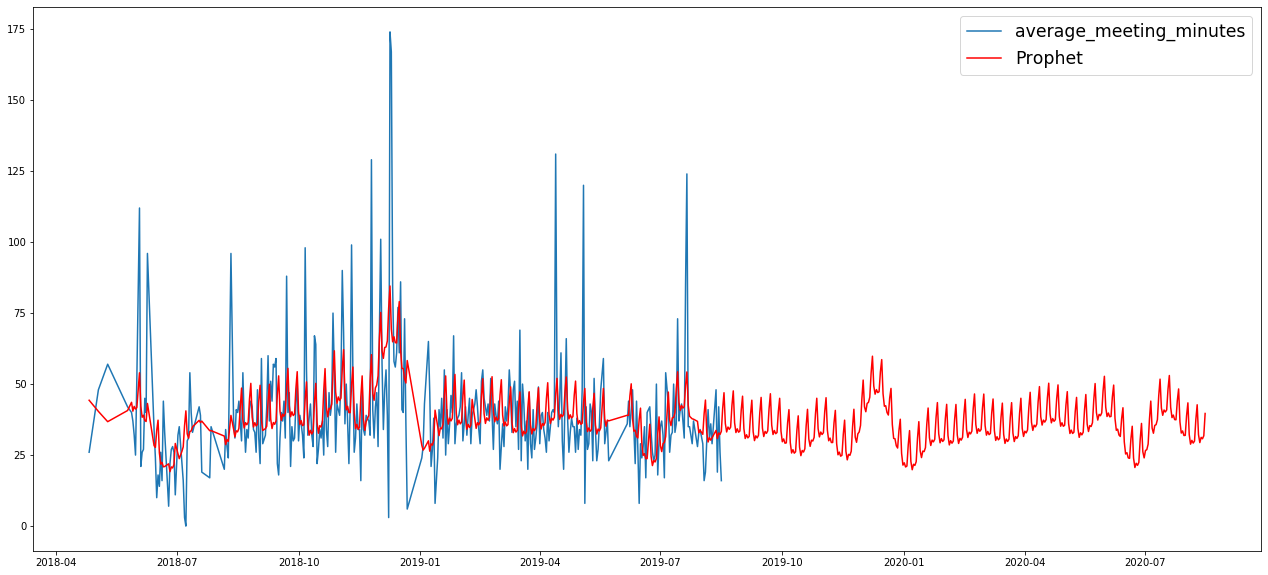

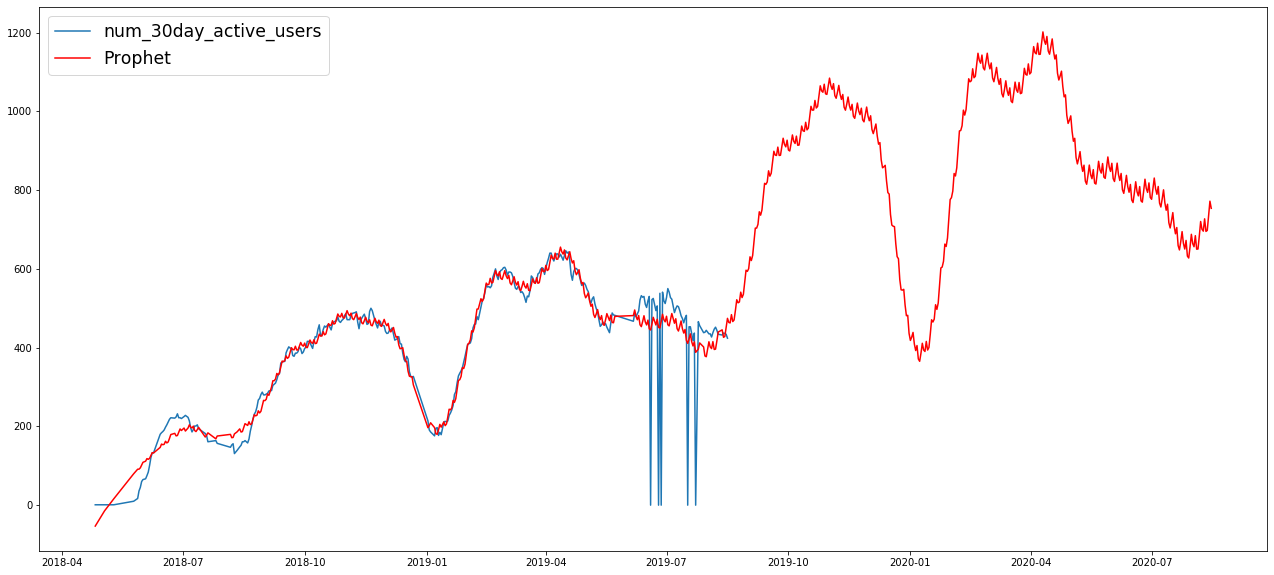

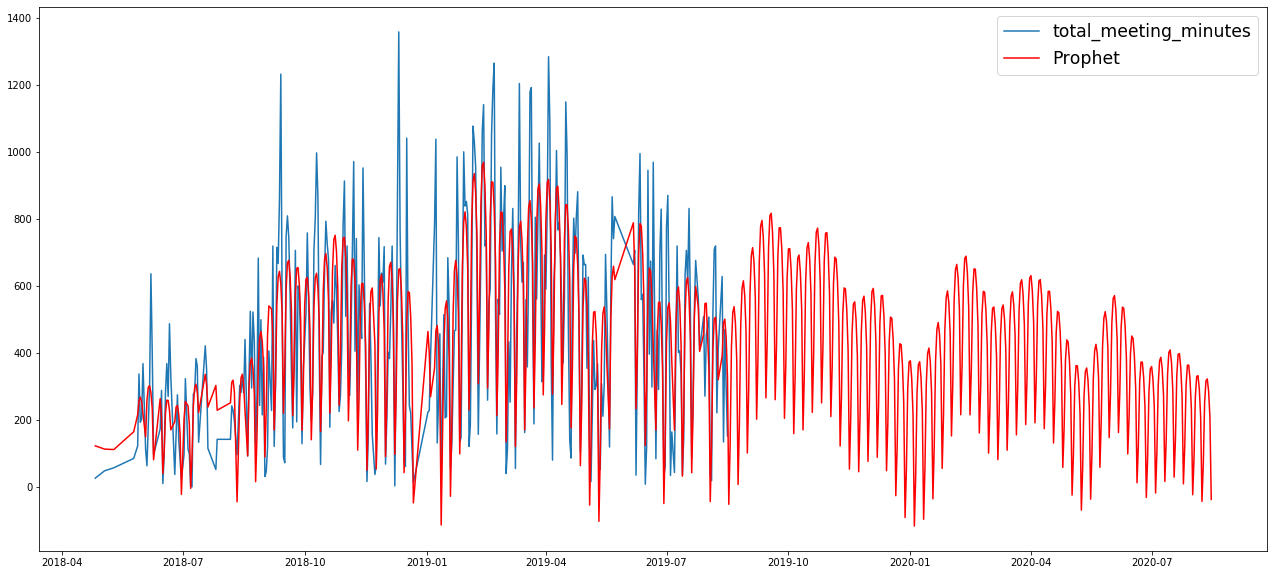

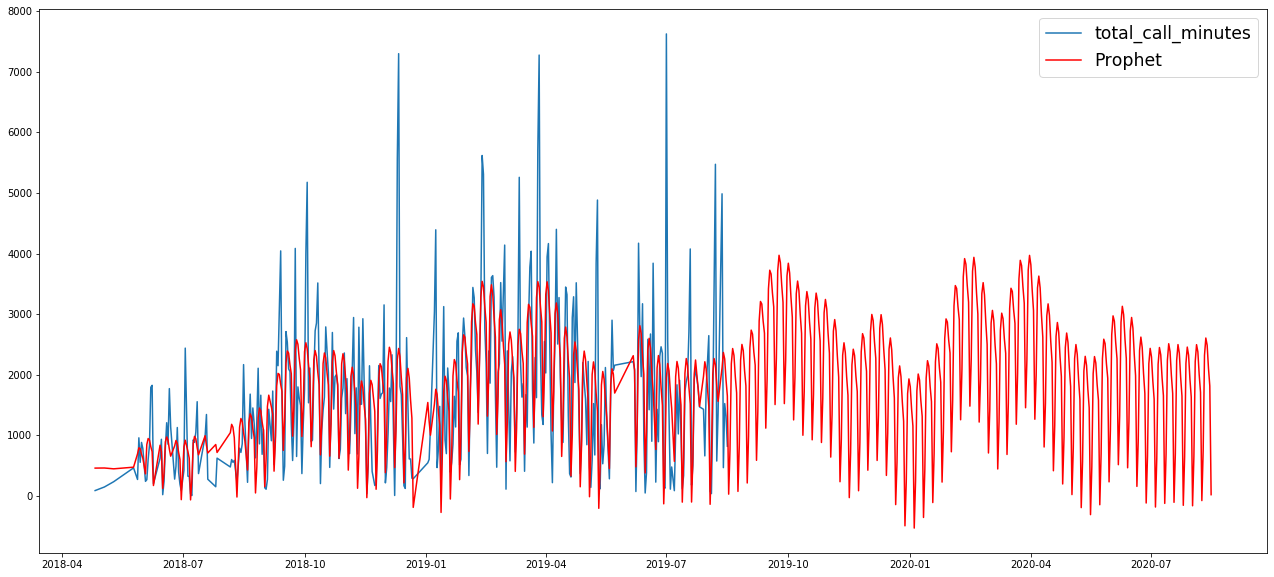

In [30]:
plot(df2,prediction)

In [32]:
prediction.head()

,time,num_meetings,num_calls,average_meeting_minutes,num_30day_active_users,total_meeting_minutes,total_call_minutes
0,2018-04-26,3.223227,12.864670,44.314641,-53.096640,122.601634,459.435757
1,2018-05-03,3.441592,13.176458,40.380467,-14.525301,112.831044,461.182178
2,2018-05-10,3.797994,13.531742,36.765775,16.247984,111.484482,447.545704
3,2018-05-25,4.687378,17.137130,40.687527,79.799483,164.466900,474.730162
4,2018-05-28,6.326263,25.892055,43.584527,91.297948,214.918316,694.301894
